# Data Science Research Methods Final Assignment

## Table Of Contents
### 1. Introductiom
### 2. Data Loading
### 3. Data Cleaning
### 4. Exploratory Data Analysis
### 5. Hypothesis Testing
### 6. Modelling
### 7. Conclusion
### 8. References

## 1.INTRODUCTION

### The objective of this project is to contribute to the development of hardware and/or software that can identify the type of physical activity engaged in by a person and to obtain practical insights utilising the PAMAP2 Physical Activity Monitoring dataset.

### The dataset comprises data from 18 various physical activities (such as walking, cycling, playing soccer, etc.) carried out by 9 subjects while wearing 3 inertial measuring units (IMU) and a heart rate monitor. Individual text files for each subject are used to hold this information. Each row in each file represents one reading and contains 54 attributes (including timestamp, activity ID, heart rate and IMU sensory data).

### The three requirements of this assignment are to:

### 1.Carry out thoroughly exploratory data analysis and appropriately handle missing or dirty data

### 2.Develop and tests at least one hypothesis for a relationship between a single pair of attributes

### 3.Develop and test at least one model which uses multiple attributes to make predictions

### To take care of all these requirements firstly the PAMAP2 dataset needs to be loaded which is very dirty and has missing values so followed by loading of data, data cleaning  needs to be done then we will move on to EDA( Exploratory Data Analysis) and gain some actionable insights from data, after that we will do Hypothesis Testing to see what the EDA tells us is actually true for the rest of the data or not and finally a model will be developed based on the insights gained.



##  2. Data Loading

In [1]:
## Importing libraries
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker 
%matplotlib inline
import seaborn as sns
from scipy import stats
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')





In [2]:
# Loading data
Files_list = ['subject101.dat',
                 'subject102.dat',
                 'subject103.dat',
                 'subject104.dat',
                 'subject105.dat',
                 'subject106.dat',
                 'subject107.dat',
                 'subject108.dat',
                 'subject109.dat' ]

subjects = [1,2,3,4,5,6,7,8,9] # list of 8 men and 1 woman who have had their physical activity monitored.

activity_ID = {0: 'transient', # list of all 24 physical activities done by the 9 individuals.
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

column_Names = ["timestamp", "activity_ID","heart_rate"] # There are three column names in the column_Names list: "timestamp", "activityID", and "heartrate".

IMU_hand = ['hand_Temperature', # List for Hand IMU parameters
           'hand_Acceleration_16_1', 'hand_Acceleration_16_2', 'hand_Acceleration_16_3', 
           'hand_Acceleration_6_1', 'hand_Acceleration_6_2', 'hand_Acceleration_6_3', 
           'hand_Gyroscope_1', 'hand_Gyroscope_2', 'hand_Gyroscope_3', 
           'hand_Magnetometer_1', 'hand_Magnetometer_2', 'hand_Magnetometer_3',
           'hand_Orientation_1', 'hand_Orientation_2', 'hand_Orientation_3', 'hand_Orientation_4']

IMU_chest = ['chest_Temperature', # List for Chest IMU parameters
           'chest_Acceleration_16_1', 'chest_Acceleration_16_2', 'chest_Acceleration_16_3', 
           'chest_Acceleration_6_1', 'chest_Acceleration_6_2', 'chest_Acceleration_6_3', 
           'chest_Gyroscope_1', 'chest_Gyroscope_2', 'chest_Gyroscope_3', 
           'chest_Magnetometer_1', 'chest_Magnetometer_2', 'chest_Magnetometer_3',
           'chest_Orientation_1', 'chest_Orientation_2', 'chest_Orientation_3', 'chest_Orientation_4']

IMU_ankle = ['ankle_Temperature',  # List for Ankle IMU parameters
           'ankle_Acceleration_16_1', 'ankle_Acceleration_16_2', 'ankle_Acceleration_16_3', 
           'ankle_Acceleration_6__1', 'ankle_Acceleration_6__2', 'ankle_Acceleration_6__3', 
           'ankle_Gyroscope_1', 'ankle_Gyroscope_2', 'ankle_Gyroscope_3', 
           'ankle_Magnetometer_1', 'ankle_Magnetometer_2', 'ankle_Magnetometer_3',
           'ankle_Orientation_1', 'ankle_Orientation_2', 'ankle_Orientation_3', 'ankle_Orientation_4']

All_columns = column_Names + IMU_hand + IMU_chest + IMU_ankle  #all columns in one list




In [3]:
# If I need the activity name from the numeric id
activity_ID_reverse = {}
for key in activity_ID.keys():
    value = activity_ID.get(key)
    activity_ID_reverse[value] = key

In [4]:
activity_ID_reverse

{'transient': 0,
 'lying': 1,
 'sitting': 2,
 'standing': 3,
 'walking': 4,
 'running': 5,
 'cycling': 6,
 'Nordic_walking': 7,
 'watching_TV': 9,
 'computer_work': 10,
 'car driving': 11,
 'ascending_stairs': 12,
 'descending_stairs': 13,
 'vacuum_cleaning': 16,
 'ironing': 17,
 'folding_laundry': 18,
 'house_cleaning': 19,
 'playing_soccer': 20,
 'rope_jumping': 24}

### A list of the file names is created in order to load all the files and create the dataframe. A dictionary that will hold the names as well as numbers of each different activity is created..

###  Lists for each different category of IMU's like chest, ankle and hand are put together to have the column names for the dataframe.

### All the different lists are put together to create the collection of the columns.

In [5]:
#creating a dataframe
df = pd.DataFrame()
for file in Files_list:
    pamap2 = pd.read_table(file, header=None, sep='\s+')
    pamap2.columns = All_columns
    pamap2['subject_id'] = int(file[-5])
    df = df.append(pamap2, ignore_index=True)

df.reset_index(drop=True, inplace=True)
df

timestamp  activity_ID  heart_rate  hand_Temperature  \
0             8.38            0       104.0           30.0000   
1             8.39            0         NaN           30.0000   
2             8.40            0         NaN           30.0000   
3             8.41            0         NaN           30.0000   
4             8.42            0         NaN           30.0000   
...            ...          ...         ...               ...   
2872528     100.19            0         NaN           25.1875   
2872529     100.20            0         NaN           25.1875   
2872530     100.21            0         NaN           25.1875   
2872531     100.22            0         NaN           25.1875   
2872532     100.23            0       161.0           25.1875   

         hand_Acceleration_16_1  hand_Acceleration_16_2  \
0                       2.37223                 8.60074   
1                       2.18837                 8.56560   
2                       2.37357                 8.60107   
3                       2.07473                 8.52853   
4                       2.22936                 8.83122   
...                         ...                     ...   
2872528                -4.71493                10.22250   
2872529                -4.95932                10.37130   
2872530                -4.93997                 9.83615   
2872531                -4.64941                 9.11129   
2872532                -4.09726                 8.15642   

         hand_Acceleration_16_3  hand_Acceleration_6_1  hand_Acceleration_6_2  \
0                       3.51048                2.43954                8.76165   
1                       3.66179                2.39494                8.55081   
2                       3.54898                2.30514                8.53644   
3                       3.66021                2.33528                8.53622   
4                       3.70000                2.23055                8.59741   
...                         ...                    ...                    ...   
2872528                 4.66893               -5.04654                9.94944   
2872529                 4.12594               -4.96890               10.29620   
2872530                 3.70468               -5.04613               10.35690   
2872531                 3.51904               -5.06854                9.75268   
2872532                 3.29961               -4.73244                8.82870   

         hand_Acceleration_6_3  ...  ankle_Gyroscope_2  ankle_Gyroscope_3  \
0                      3.35465  ...           0.009250          -0.017580   
1                      3.64207  ...          -0.004638           0.000368   
2                      3.73280  ...           0.000148           0.022495   
3                      3.73277  ...          -0.020301           0.011275   
4                      3.76295  ...          -0.014303          -0.002823   
...                        ...  ...                ...                ...   
2872528                4.50736  ...          -0.062676          -0.127084   
2872529                4.43102  ...          -0.027006          -0.089808   
2872530                4.14405  ...          -0.038024          -0.064709   
2872531                3.87359  ...          -0.025796          -0.064357   
2872532                3.54305  ...           0.011866          -0.042858   

         ankle_Magnetometer_1  ankle_Magnetometer_2  ankle_Magnetometer_3  \
0                    -61.1888             -38.95990            -58.143800   
1                    -59.8479             -38.89190            -58.525300   
2                    -60.7361             -39.41380            -58.399900   
3                    -60.4091             -38.76350            -58.395600   
4                    -61.5199             -39.38790            -58.269400   
...                       ...                   ...                   ...   
2872528              -46.5153               3.58240             -0.035995   
28725

### A dataframe is created and stored as df that has 2872533 rows and 55 columns

## 3. Data Cleaning

### The practise of correcting or deleting inaccurate, damaged, improperly formatted, duplicate, or missing data from a dataset is known as data cleaning. The quality of analyses and algorithms depends on the data upon which they are built. Even though results and algorithms appear to be right, they are unreliable if the data is inaccurate. Therefore, we shall now examine a crucial procedure called data cleansing.

### From a look at the **PerformedActivitiesSummary** file which is part of the collection of files given, it can be seen that various data is missing and as the **readme** file comments on, there were some wireless disconnections in data collection therefore the missing data has to be accounted for and made up in a way that our data analysis will not be impacted.

In [6]:
df.isnull().sum() ### Checking for null values if any

timestamp                        0
activity_ID                      0
heart_rate                 2610265
hand_Temperature             13141
hand_Acceleration_16_1       13141
hand_Acceleration_16_2       13141
hand_Acceleration_16_3       13141
hand_Acceleration_6_1        13141
hand_Acceleration_6_2        13141
hand_Acceleration_6_3        13141
hand_Gyroscope_1             13141
hand_Gyroscope_2             13141
hand_Gyroscope_3             13141
hand_Magnetometer_1          13141
hand_Magnetometer_2          13141
hand_Magnetometer_3          13141
hand_Orientation_1           13141
hand_Orientation_2           13141
hand_Orientation_3           13141
hand_Orientation_4           13141
chest_Temperature             3563
chest_Acceleration_16_1       3563
chest_Acceleration_16_2       3563
chest_Acceleration_16_3       3563
chest_Acceleration_6_1        3563
chest_Acceleration_6_2        3563
chest_Acceleration_6_3        3563
chest_Gyroscope_1             3563
chest_Gyroscope_2   

In [7]:
 df.isnull().sum().sort_values(ascending=False)*100/len(df) # Percentage of null values of each column

heart_rate                 90.869800
hand_Orientation_3          0.457471
hand_Gyroscope_1            0.457471
hand_Orientation_4          0.457471
hand_Orientation_2          0.457471
hand_Orientation_1          0.457471
hand_Magnetometer_3         0.457471
hand_Magnetometer_2         0.457471
hand_Gyroscope_3            0.457471
hand_Gyroscope_2            0.457471
hand_Magnetometer_1         0.457471
hand_Acceleration_6_3       0.457471
hand_Acceleration_6_2       0.457471
hand_Acceleration_6_1       0.457471
hand_Acceleration_16_3      0.457471
hand_Acceleration_16_2      0.457471
hand_Acceleration_16_1      0.457471
hand_Temperature            0.457471
ankle_Orientation_4         0.409012
ankle_Acceleration_16_1     0.409012
ankle_Acceleration_16_2     0.409012
ankle_Acceleration_16_3     0.409012
ankle_Acceleration_6__1     0.409012
ankle_Acceleration_6__2     0.409012
ankle_Acceleration_6__3     0.409012
ankle_Gyroscope_1           0.409012
ankle_Orientation_2         0.409012
a

### I'm eliminating the data from the accelerometer with scale: 6g since it gets saturated occasionally owing to significant impacts created by various actions (e.g., running) with acceleration > 6g. Instead, we may utilise accelerometer data with the scale: 16g. 
### I'm also eliminating the orientation data because it's useless for predicting activities.
### removing rows of activity 0 as it is transient activity which is not used
### removing non numeric data in the cells
### Dealing with the missing values by using the "nearest" or "linear" method of interpolation. Either of the aforementioned methods will be effective for interpolating since the frequency of data collection is high compared to the possible complex harmonic oscillation frequency of the body part during vigorous body movements.

In [8]:
def data_Cleaning(df):
        df = df.drop(['hand_Orientation_1', 'hand_Orientation_2', 'hand_Orientation_3', 'hand_Orientation_4', 'chest_Orientation_1', 'chest_Orientation_2', 'chest_Orientation_3', 'chest_Orientation_4', 'ankle_Orientation_1', 'ankle_Orientation_2', 'ankle_Orientation_3', 'ankle_Orientation_4'],axis = 1)  # removal of orientation columns as they are not needed
        df = df.drop(['hand_Acceleration_6_1','hand_Acceleration_6_2','hand_Acceleration_6_3','chest_Acceleration_6_1','chest_Acceleration_6_2','chest_Acceleration_6_3','ankle_Acceleration_6__1','ankle_Acceleration_6__2','ankle_Acceleration_6__3'],axis = 1) # removal of data from the accelerometer with scale: 6g
        df = df.drop(df[df.activity_ID == 0].index) #removal of any row of activity 0 as it is transient activity which is not used
        df = df.apply(pd.to_numeric, errors = 'coerce') #removal of non numeric data in cells
        df = df.interpolate() #removal of any remaining NaN value cells by constructing new data points in known set of data points
        
        return df


In [9]:
Clean_data = data_Cleaning(df)
Clean_data.reset_index(drop = True, inplace = True) ## Clean data is stored in a new dataframe called Clean_data
Clean_data

timestamp  activity_ID  heart_rate  hand_Temperature  \
0            37.66            1         NaN            30.375   
1            37.67            1         NaN            30.375   
2            37.68            1         NaN            30.375   
3            37.69            1         NaN            30.375   
4            37.70            1       100.0            30.375   
...            ...          ...         ...               ...   
1942867      95.06           24       162.0            25.125   
1942868      95.07           24       162.0            25.125   
1942869      95.08           24       162.0            25.125   
1942870      95.09           24       162.0            25.125   
1942871      95.10           24       162.0            25.125   

         hand_Acceleration_16_1  hand_Acceleration_16_2  \
0                       2.21530                 8.27915   
1                       2.29196                 7.67288   
2                       2.29090                 7.14240   
3                       2.21800                 7.14365   
4                       2.30106                 7.25857   
...                         ...                     ...   
1942867                 4.99466                 6.01881   
1942868                 5.02764                 5.90369   
1942869                 5.06409                 5.71370   
1942870                 5.13914                 5.63724   
1942871                 5.00812                 5.40645   

         hand_Acceleration_16_3  hand_Gyroscope_1  hand_Gyroscope_2  \
0                       5.58753         -0.004750          0.037579   
1                       5.74467         -0.171710          0.025479   
2                       5.82342         -0.238241          0.011214   
3                       5.89930         -0.192912          0.019053   
4                       6.09259         -0.069961         -0.018328   
...                         ...               ...               ...   
1942867                 5.59830         -0.289166         -0.110170   
1942868                 5.48372         -0.275411         -0.128358   
1942869                 5.48491         -0.289885         -0.126548   
1942870                 5.48629         -0.234417         -0.101485   
1942871                 5.02326         -0.260924         -0.093849   

         hand_Gyroscope_3  ...  ankle_Acceleration_16_1  \
0               -0.011145  ...                  9.73855   
1               -0.009538  ...                  9.69762   
2                0.000831  ...                  9.69633   
3                0.013374  ...                  9.66370   
4                0.004582  ...                  9.77578   
...                   ...  ...                      ...   
1942867          0.238570  ...                  9.40727   
1942868          0.267409  ...                  9.36745   
1942869          0.281483  ...                  9.36765   
1942870          0.275497  ...                  9.44470   
1942871          0.266205  ...                  9.44670   

         ankle_Acceleration_16_2  ankle_Acceleration_16_3  ankle_Gyroscope_1  \
0                       -1.84761                 0.095156           0.002908   
1                       -1.88438                -0.020804           0.020882   
2                       -1.92203                -0.059173          -0.035392   
3                       -1.84714                 0.094385          -0.032514   
4                       -1.88582                 0.095775           0.001351   
...                          ...                      ...                ...   
1942867                 -2.24401                -2.259740           0.021288   
1942868                 -2.28110                -2.337100           0.010715   
1942869                 -2.24313                -2.337340          -0.016939   
1942870                 -2.24425                -2.259360          -0.028069   
1942871                 -2.28286                -2.181920          -0.013310 

### Our clean dataset now has 1942872 rows and 34 columns

In [10]:
df.duplicated().sum() # checking for duplicate values if any

0

In [11]:
Clean_data.isnull().sum() # checking if there are any null values left

timestamp                  0
activity_ID                0
heart_rate                 4
hand_Temperature           0
hand_Acceleration_16_1     0
hand_Acceleration_16_2     0
hand_Acceleration_16_3     0
hand_Gyroscope_1           0
hand_Gyroscope_2           0
hand_Gyroscope_3           0
hand_Magnetometer_1        0
hand_Magnetometer_2        0
hand_Magnetometer_3        0
chest_Temperature          0
chest_Acceleration_16_1    0
chest_Acceleration_16_2    0
chest_Acceleration_16_3    0
chest_Gyroscope_1          0
chest_Gyroscope_2          0
chest_Gyroscope_3          0
chest_Magnetometer_1       0
chest_Magnetometer_2       0
chest_Magnetometer_3       0
ankle_Temperature          0
ankle_Acceleration_16_1    0
ankle_Acceleration_16_2    0
ankle_Acceleration_16_3    0
ankle_Gyroscope_1          0
ankle_Gyroscope_2          0
ankle_Gyroscope_3          0
ankle_Magnetometer_1       0
ankle_Magnetometer_2       0
ankle_Magnetometer_3       0
subject_id                 0
dtype: int64

### The reason why heartrate still has NaN values is because interpolation calculates the values around the NaN cell. Since the first cells are NaN it is normal to generate new NaN values after interpolation. To overcome this problem we can assume that the value of the first 4 cells is 100 since the values after the index 4 is 100.

In [12]:
for i in range(0,4):
    Clean_data["heart_rate"].iloc[i]=100 # assuming that the value of the first 4 cells of heart_rate is 100 since the values after the index 4 is 100.


In [13]:
Clean_data.isnull().sum() #check again is the null value changed to zero or not.

timestamp                  0
activity_ID                0
heart_rate                 0
hand_Temperature           0
hand_Acceleration_16_1     0
hand_Acceleration_16_2     0
hand_Acceleration_16_3     0
hand_Gyroscope_1           0
hand_Gyroscope_2           0
hand_Gyroscope_3           0
hand_Magnetometer_1        0
hand_Magnetometer_2        0
hand_Magnetometer_3        0
chest_Temperature          0
chest_Acceleration_16_1    0
chest_Acceleration_16_2    0
chest_Acceleration_16_3    0
chest_Gyroscope_1          0
chest_Gyroscope_2          0
chest_Gyroscope_3          0
chest_Magnetometer_1       0
chest_Magnetometer_2       0
chest_Magnetometer_3       0
ankle_Temperature          0
ankle_Acceleration_16_1    0
ankle_Acceleration_16_2    0
ankle_Acceleration_16_3    0
ankle_Gyroscope_1          0
ankle_Gyroscope_2          0
ankle_Gyroscope_3          0
ankle_Magnetometer_1       0
ankle_Magnetometer_2       0
ankle_Magnetometer_3       0
subject_id                 0
dtype: int64

In [14]:
Clean_data # checking the clean data

timestamp  activity_ID  heart_rate  hand_Temperature  \
0            37.66            1       100.0            30.375   
1            37.67            1       100.0            30.375   
2            37.68            1       100.0            30.375   
3            37.69            1       100.0            30.375   
4            37.70            1       100.0            30.375   
...            ...          ...         ...               ...   
1942867      95.06           24       162.0            25.125   
1942868      95.07           24       162.0            25.125   
1942869      95.08           24       162.0            25.125   
1942870      95.09           24       162.0            25.125   
1942871      95.10           24       162.0            25.125   

         hand_Acceleration_16_1  hand_Acceleration_16_2  \
0                       2.21530                 8.27915   
1                       2.29196                 7.67288   
2                       2.29090                 7.14240   
3                       2.21800                 7.14365   
4                       2.30106                 7.25857   
...                         ...                     ...   
1942867                 4.99466                 6.01881   
1942868                 5.02764                 5.90369   
1942869                 5.06409                 5.71370   
1942870                 5.13914                 5.63724   
1942871                 5.00812                 5.40645   

         hand_Acceleration_16_3  hand_Gyroscope_1  hand_Gyroscope_2  \
0                       5.58753         -0.004750          0.037579   
1                       5.74467         -0.171710          0.025479   
2                       5.82342         -0.238241          0.011214   
3                       5.89930         -0.192912          0.019053   
4                       6.09259         -0.069961         -0.018328   
...                         ...               ...               ...   
1942867                 5.59830         -0.289166         -0.110170   
1942868                 5.48372         -0.275411         -0.128358   
1942869                 5.48491         -0.289885         -0.126548   
1942870                 5.48629         -0.234417         -0.101485   
1942871                 5.02326         -0.260924         -0.093849   

         hand_Gyroscope_3  ...  ankle_Acceleration_16_1  \
0               -0.011145  ...                  9.73855   
1               -0.009538  ...                  9.69762   
2                0.000831  ...                  9.69633   
3                0.013374  ...                  9.66370   
4                0.004582  ...                  9.77578   
...                   ...  ...                      ...   
1942867          0.238570  ...                  9.40727   
1942868          0.267409  ...                  9.36745   
1942869          0.281483  ...                  9.36765   
1942870          0.275497  ...                  9.44470   
1942871          0.266205  ...                  9.44670   

         ankle_Acceleration_16_2  ankle_Acceleration_16_3  ankle_Gyroscope_1  \
0                       -1.84761                 0.095156           0.002908   
1                       -1.88438                -0.020804           0.020882   
2                       -1.92203                -0.059173          -0.035392   
3                       -1.84714                 0.094385          -0.032514   
4                       -1.88582                 0.095775           0.001351   
...                          ...                      ...                ...   
1942867                 -2.24401                -2.259740           0.021288   
1942868                 -2.28110                -2.337100           0.010715   
1942869                 -2.24313                -2.337340          -0.016939   
1942870                 -2.24425                -2.259360          -0.028069   
1942871                 -2.28286                -2.181920          -0.013310 

### We may create new columns and determine the resultant acceleration and angular velocity for the hand, chest, and ankle independently and drop the individual acceleration and angular velocity measurments in each axis. Additionally, the magnetic field measurement is not very helpful if our goal is to simply identify the activity that a person is performing because none of the activities listed interfere with the Earth's magnetic field. As a result, I will drop it because it only depends on the location where the activity is being carried out by the person (the Earth's magnetic field) and not the activity itself.

### The resultant acceleration is given by

### $a_{(res)} = \sqrt {a_x^2 \, +\, a_y^2 \,+\, a_z^2}$ 

### and the resultant angular velocity is given by

### $\omega_{(res)} = \sqrt {\omega_x^2 \, +\, \omega_y^2 \,+\, \omega_z^2}$

In [15]:
#finding resultant acceleration, and angular velocity for hand, chest and ankle
Clean_data['Acceleration_hand'] = ((Clean_data.hand_Acceleration_16_1**2)+(Clean_data.hand_Acceleration_16_2**2)+(Clean_data.hand_Acceleration_16_3**2))**0.5
Clean_data['Acceleration_chest'] = ((Clean_data.chest_Acceleration_16_1**2)+(Clean_data.chest_Acceleration_16_2**2)+(Clean_data.chest_Acceleration_16_3**2))**0.5
Clean_data['Acceleration_ankle'] = ((Clean_data.ankle_Acceleration_16_1**2)+(Clean_data.ankle_Acceleration_16_2**2)+(Clean_data.ankle_Acceleration_16_3**2))**0.5
Clean_data['Gyroscope_hand'] = ((Clean_data.hand_Gyroscope_1**2)+(Clean_data.hand_Gyroscope_2**2)+(Clean_data.hand_Gyroscope_3**2))**0.5
Clean_data['Gyroscope_chest'] = ((Clean_data.chest_Gyroscope_1**2)+(Clean_data.chest_Gyroscope_2**2)+(Clean_data.chest_Gyroscope_3**2))**0.5
Clean_data['Gyroscope_ankle'] = ((Clean_data.ankle_Gyroscope_1**2)+(Clean_data.ankle_Gyroscope_2**2)+(Clean_data.ankle_Gyroscope_3**2))**0.5

In [16]:
#removing all of the individual acceleration,angularvelocity and magneticfield measurements and
to_drop = ['hand_Acceleration_16_1','hand_Acceleration_16_2','hand_Acceleration_16_3','ankle_Acceleration_16_1','ankle_Acceleration_16_2','ankle_Acceleration_16_3','chest_Acceleration_16_1','chest_Acceleration_16_2','chest_Acceleration_16_3','hand_Gyroscope_1','hand_Gyroscope_2','hand_Gyroscope_3','chest_Gyroscope_1','chest_Gyroscope_2','chest_Gyroscope_3','ankle_Gyroscope_1','ankle_Gyroscope_2','ankle_Gyroscope_3','hand_Magnetometer_1','hand_Magnetometer_2','hand_Magnetometer_3','chest_Magnetometer_1','chest_Magnetometer_2','chest_Magnetometer_3','ankle_Magnetometer_1','ankle_Magnetometer_2','ankle_Magnetometer_3']
Clean_data2 = Clean_data.drop(to_drop, axis = 1)
Clean_data2

timestamp  activity_ID  heart_rate  hand_Temperature  \
0            37.66            1       100.0            30.375   
1            37.67            1       100.0            30.375   
2            37.68            1       100.0            30.375   
3            37.69            1       100.0            30.375   
4            37.70            1       100.0            30.375   
...            ...          ...         ...               ...   
1942867      95.06           24       162.0            25.125   
1942868      95.07           24       162.0            25.125   
1942869      95.08           24       162.0            25.125   
1942870      95.09           24       162.0            25.125   
1942871      95.10           24       162.0            25.125   

         chest_Temperature  ankle_Temperature  subject_id  Acceleration_hand  \
0                  32.1875              30.75           1          10.230952   
1                  32.1875              30.75           1           9.855324   
2                  32.1875              30.75           1           9.496016   
3                  32.1875              30.75           1           9.526437   
4                  32.1875              30.75           1           9.751993   
...                    ...                ...         ...                ...   
1942867            32.3750              31.50           9           9.618402   
1942868            32.3750              31.50           9           9.497468   
1942869            32.3750              31.50           9           9.400830   
1942870            32.3750              31.50           9           9.396202   
1942871            32.3750              31.50           9           8.918750   

         Acceleration_chest  Acceleration_ankle  Gyroscope_hand  \
0                  9.791172            9.912723        0.039483   
1                  9.791979            9.879026        0.173852   
2                  9.907409            9.885166        0.238506   
3                  9.879549            9.839102        0.194311   
4                  9.875840            9.956473        0.072467   
...                     ...                 ...             ...   
1942867            9.666870            9.931704        0.390730   
1942868            9.495778            9.920412        0.404765   
1942869            9.641109            9.911996        0.423415   
1942870            9.710290            9.967132        0.375698   
1942871            9.668169            9.960540        0.384388   

         Gyroscope_chest  Gyroscope_ankle  
0               0.066375         0.027921  
1               0.067424         0.021749  
2               0.060338         0.063439  
3               0.090952         0.046244  
4               0.041521         0.049304  
...                  ...              ...  
1942867         0.212408         0.025569  
1942868         0.177611         0.012079  
1942869         0.143632         0.039110  
1942870         0.154072         0.046552  
1942871         0.160110         0.037698  

[1942872 rows x 13 columns]

### After the final step our data now has 1942872 rows and 13 columns

### Since our data is totally clean now we will move on to Exploratory Data Analysis (EDA).

## 4. Exploratory Data Analysis

### Exploratory data analysis (EDA), which frequently makes use of data visualisation techniques, is used to examine and study data sets and summarise their key properties. It makes it simpler to find patterns, identify anomalies and outliers, test hypotheses, and verify presumptions. It is important to look beyond formal modelling or hypothesis testing in order to gain a deeper knowledge of the variables in a data collection and the relationships between them. So now we will move on to our third step Exploratory data analysis (EDA).

### Splitting Data in eda and hypo sets so that we can perform exploratory data analysis on one set and hypothesis testing on the other.

In [17]:
df_eda = Clean_data2.sample(frac=0.5, random_state=1) # dataset to perform eda
df_hypo = Clean_data2.drop(df_eda.index) # dataset to perform hypothesis

### In order to learn more about how our data is being handled for our research, we need to examine certain statistics and insights from the describe method from pandas.

In [18]:
df_eda.describe() # eda dataset statistics

timestamp    activity_ID     heart_rate  hand_Temperature  \
count  971436.000000  971436.000000  971436.000000     971436.000000   
mean     1703.994666       8.081953     107.445857         32.751715   
std      1093.247832       6.174908      26.975255          1.793871   
min        31.220000       1.000000      57.000000         24.875000   
25%       744.560000       3.000000      86.000000         31.687500   
50%      1478.680000       6.000000     104.000000         33.125000   
75%      2662.552500      13.000000     124.000000         34.062500   
max      4245.680000      24.000000     202.000000         35.500000   

       chest_Temperature  ankle_Temperature     subject_id  Acceleration_hand  \
count      971436.000000      971436.000000  971436.000000      971436.000000   
mean           36.178833          33.712038       4.565264          10.977280   
std             1.494366           1.092365       2.332310           5.654806   
min            31.937500          30.000000       1.000000           0.143968   
25%            35.187500          33.000000       2.000000           9.442282   
50%            36.437500          34.062500       5.000000           9.799365   
75%            37.437500          34.500000       7.000000          11.297209   
max            38.562500          35.437500       9.000000         219.854889   

       Acceleration_chest  Acceleration_ankle  Gyroscope_hand  \
count       971436.000000       971436.000000   971436.000000   
mean            10.181383           12.396208        1.515249   
std              3.843026            7.699569        1.717965   
min              0.061476            0.097642        0.000614   
25%              9.469195            9.859249        0.168419   
50%              9.828922           10.043589        0.983045   
75%             10.397810           11.720861        2.244057   
max            150.261387          236.787687       27.758566   

       Gyroscope_chest  Gyroscope_ankle  
count    971436.000000    971436.000000  
mean          0.520307         1.429554  
std           0.594671         1.914808  
min           0.000448         0.000579  
25%           0.095730         0.058243  
50%           0.367689         0.535571  
75%           0.704414         2.135563  
max          18.682133        21.657874

### As hinted by the different indications on the readme file of the dataset, we will concentrate on heart rate because it is our most reliable gauge of progress for tracking subjects during activities Keeping this in mind, we can see from the table that the dataset's mean heart rate is 107.4. Additionally, the lowest heart rate is 57 and the highest is 202. The quartiles that are now displayed may be further examined by creating a box plot, which will aid in comprehending our outliers and quartile groupings as well as the mean heart rate of our data.

In [19]:
#Calculate the size, shape, number of columns, number of subjects, and number of activities in the eda dataset
print('Dataset information after split :\n')
print('Size of the eda data: ', df_eda.size) # calculates the total number of elements in the dataset
print('Shape of the eda data: ', df_eda.shape) # returns the dimensions of the dataset (rows, columns)
print('Number of columns in the eda data: ', len(df_eda.columns)) # calculates the number of columns in the dataset
#Grouping the data by subject_id and calculating the mean of each group
value_subject_id = df_eda.groupby(['subject_id']).mean().reset_index()
print('Number of "subjects" in the data: ', len(value_subject_id)) # calculates the number of unique subjects in the dataset
#Grouping the data by activity_ID and calculating the mean of each group
value_activities = df_eda.groupby(['activity_ID']).mean().reset_index()
print('Number of "activities" in the data: ',len(value_activities)) # calculates the number of unique activities in the dataset

Dataset information after split :

Size of the eda data:  12628668
Shape of the eda data:  (971436, 13)
Number of columns in the eda data:  13
Number of "subjects" in the data:  9
Number of "activities" in the data:  12


Eda Dataset Activities Count:
ironing              119647
walking              119187
lying                 96364
standing              94933
Nordic_walking        93861
sitting               92764
vacuum_cleaning       87542
cycling               82516
ascending_stairs      58763
descending_stairs     52377
running               48882
rope_jumping          24600
Name: activity_ID, dtype: int64


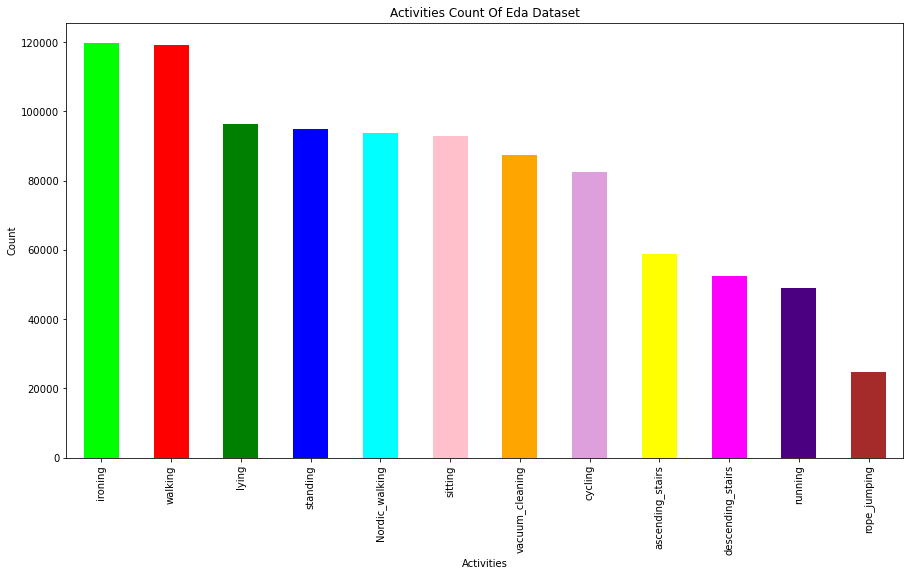

In [20]:
print('Eda Dataset Activities Count:')
activity_counts = df_eda['activity_ID'].value_counts()
activity_counts.index = activity_counts.index.map(activity_ID)
print(activity_counts) # activities count in eda dataset
activity_counts.plot(kind = 'bar', figsize = (15,8), color=['lime', 'red', 'green', 'blue', 'cyan','pink','orange','plum','yellow','magenta','indigo','brown'])
plt.xlabel('Activities')
plt.ylabel('Count')
plt.title('Activities Count Of Eda Dataset')
plt.xticks(rotation=90)
plt.show()

### It is clear from the above table that walking and ironing have the most data points, followed by lying, standing, running, and rope jumping has the fewest data points.


### Acceleration analysis

In [21]:
# To find the hand,chest and ankle average accelaration
df_Acceleration_hand_mean = df_eda['Acceleration_hand'].groupby(df_eda['activity_ID']).mean() - 9.81 # 9.81(accelartion due to gravity) is reduced so that while plotting it will give better idea of vigour of the movement of the body part
df_Acceleration_chest_mean = df_eda['Acceleration_chest'].groupby(df_eda['activity_ID']).mean() - 9.81
df_Acceleration_ankle_mean = df_eda['Acceleration_ankle'].groupby(df_eda['activity_ID']).mean() - 9.81

df_Acceleration_hand_mean.index = df_Acceleration_hand_mean.index.map(activity_ID)
df_Acceleration_chest_mean.index = df_Acceleration_chest_mean.index.map(activity_ID)
df_Acceleration_ankle_mean.index = df_Acceleration_ankle_mean.index.map(activity_ID)



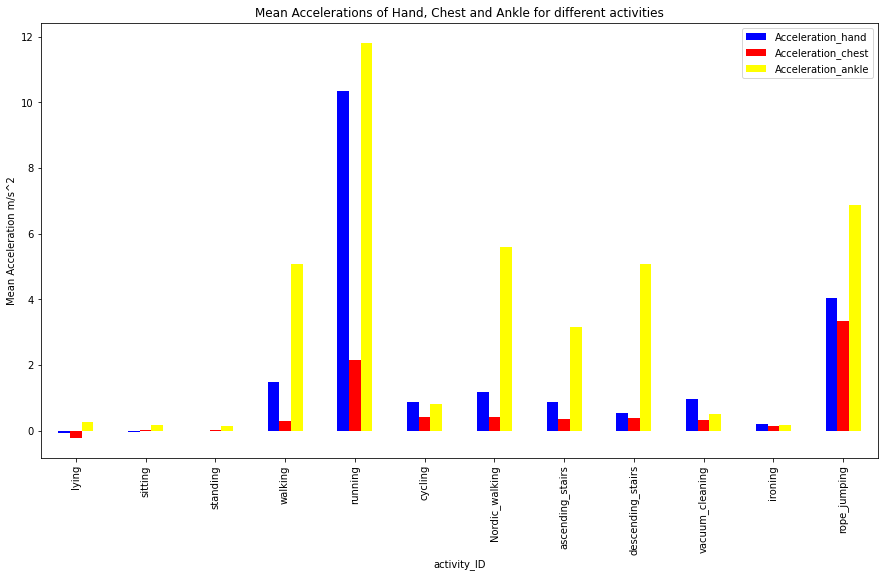

In [22]:
df_Acceleration_mean = pd.concat([df_Acceleration_hand_mean,df_Acceleration_chest_mean,df_Acceleration_ankle_mean],axis = 1)# concating the different means togather so that it can be plotted in the same plot as a bar graph
df_Acceleration_mean.plot(kind = 'bar', figsize = (15,8), color = ('blue','red','yellow'))
plt.ylabel('Mean Acceleration m/s^2')
plt.title('Mean Accelerations of Hand, Chest and Ankle for different activities')
plt.show()

### Ironing, sitting, standing, lying and other physically easy tasks have extremely low mean accelerations for various body parts, as is to be expected. The mean acceleration values for the ankle and hand, however, are noticeably high during physically demanding activities like running and rope jumping. cycling is an exception, but other leg-heavy activities including walking, Nordic walking, and ascending and descending stairs have high mean ankle acceleration rates.

### With the exception of rope jumping, practically other activities have minimal chest acceleration.


### Angular velocity analysis

In [23]:
# To find the hand,chest and ankle average angular velocity
df_Gyroscope_hand_max = df_eda['Gyroscope_hand'].groupby(df_eda['activity_ID']).mean()
df_Gyroscope_chest_max = df_eda['Gyroscope_chest'].groupby(df_eda['activity_ID']).mean()
df_Gyroscope_ankle_max = df_eda['Gyroscope_ankle'].groupby(df_eda['activity_ID']).mean()

df_Gyroscope_hand_max.index = df_Gyroscope_hand_max.index.map(activity_ID)
df_Gyroscope_chest_max.index = df_Gyroscope_chest_max.index.map(activity_ID)
df_Gyroscope_ankle_max.index = df_Gyroscope_ankle_max.index.map(activity_ID)



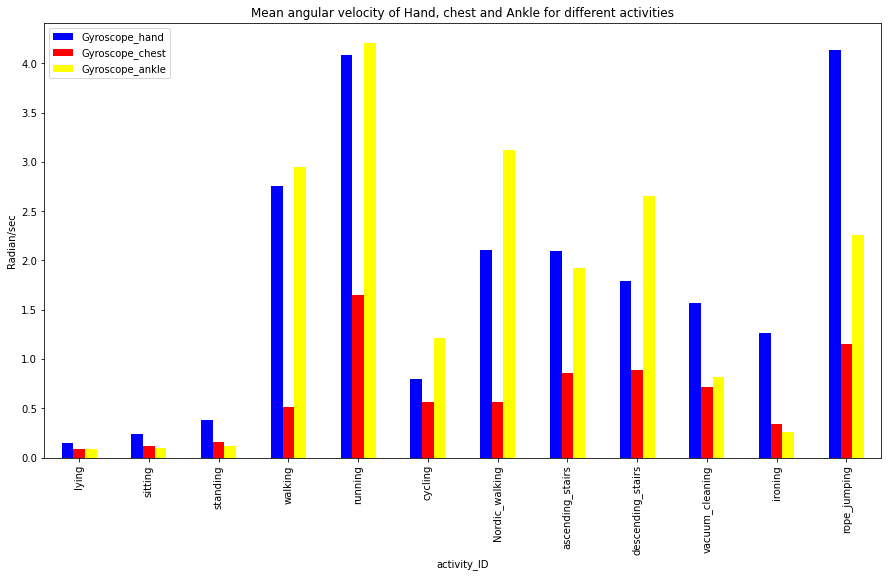

In [24]:
df_Angular_velocity_max = pd.concat([df_Gyroscope_hand_max,df_Gyroscope_chest_max,df_Gyroscope_ankle_max],axis =1)# concating the different means togather so that it can be plotted in the same plot as a tripple bar graph
df_Angular_velocity_max.plot(kind = 'bar', figsize = (15,8), color = ('blue','red','yellow'))
plt.ylabel('Radian/sec')
plt.title('Mean angular velocity of Hand, chest and Ankle for different activities')
plt.show()

### Except for ironing, which has a significant mean angular acceleration in the hand, physically non challenging activities have low angular velocities for each body part, as can be observed from the above bar graph.

### For both the hand and ankle, running has a high mean angular acceleration of 4.2rad/sec. Rope jumping has the highest mean hand angular acceleration (4.5rad/sec), however the ankle acceleration is relatively low in comparison to the hand.

### The mean ankle acceleration is significantly higher for descending stairs than ascending.

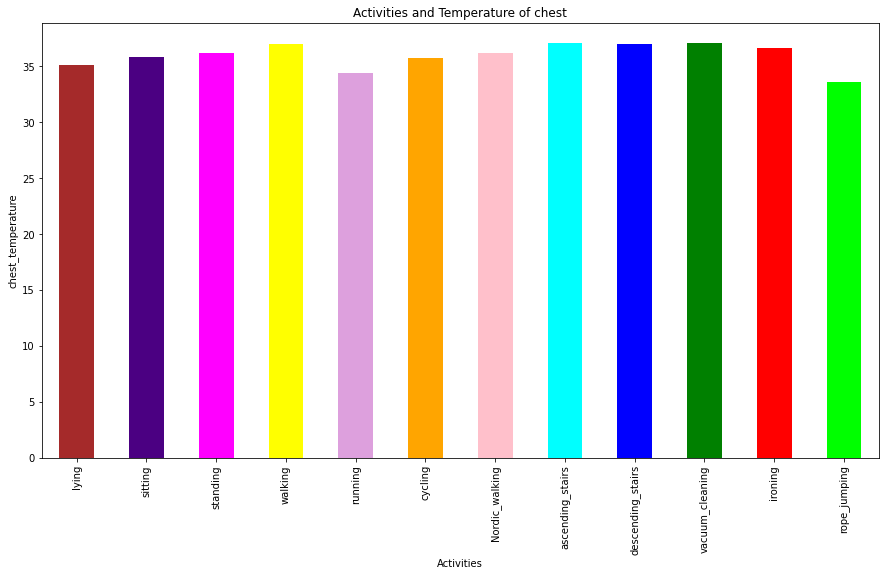

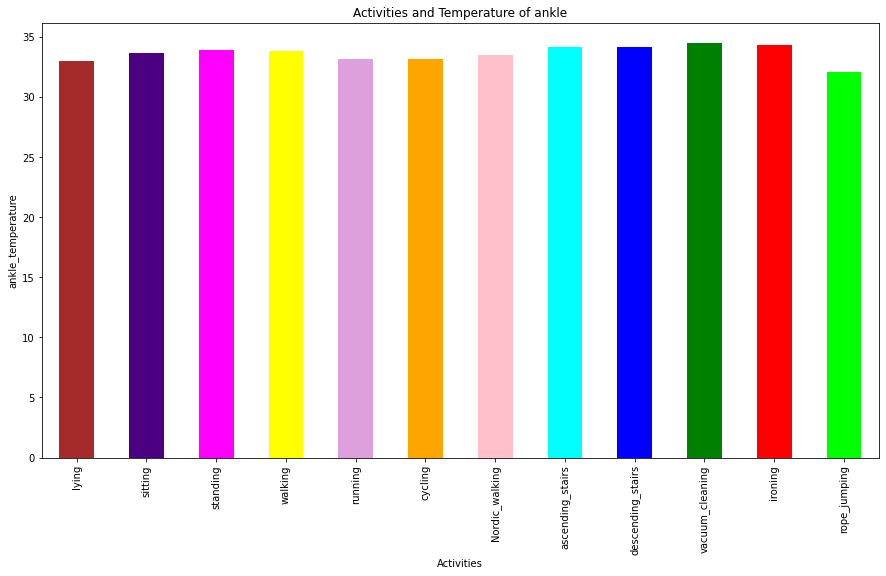

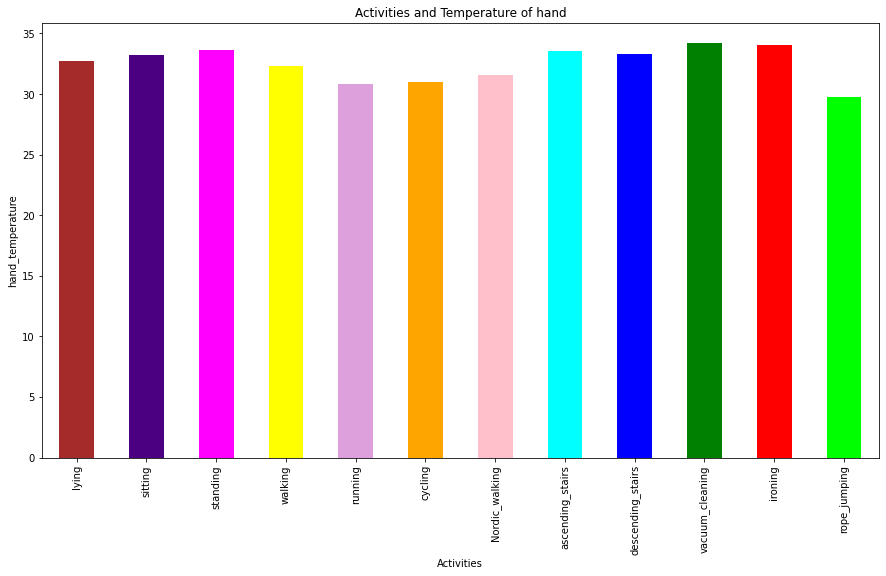

In [25]:
chest_temperature_vs_activities=df_eda['chest_Temperature'].groupby(df_eda['activity_ID']).mean()#grouping chest temperature data wrt activity id and finds the mean of chest temperature for each activity
chest_temperature_vs_activities.index = chest_temperature_vs_activities.index.map(activity_ID)# to get the real activity id as index
chest_temperature_vs_activities.plot(kind = 'bar',figsize = (15,8), color=['brown', 'indigo', 'magenta', 'yellow', 'plum','orange','pink','cyan','blue','green','red','lime'])
plt.xticks(rotation=90)
plt.ylabel('chest_temperature')
plt.xlabel('Activities')
plt.title('Activities and Temperature of chest')
plt.show()

ankle_temperature_vs_activities=df_eda['ankle_Temperature'].groupby(df_eda['activity_ID']).mean()#grouping ankle temperature data wrt activity id and finds the mean of ankle temperature for each activity
ankle_temperature_vs_activities.index = ankle_temperature_vs_activities.index.map(activity_ID)# to get the real activity id as index
ankle_temperature_vs_activities.plot(kind = 'bar',figsize = (15,8), color=['brown', 'indigo', 'magenta', 'yellow', 'plum','orange','pink','cyan','blue','green','red','lime'])
plt.xticks(rotation=90)
plt.ylabel('ankle_temperature')
plt.xlabel('Activities')
plt.title('Activities and Temperature of ankle')
plt.show()


hand_temperature_vs_activities=df_eda['hand_Temperature'].groupby(df_eda['activity_ID']).mean()#grouping hand temperature data wrt activity id and finds the mean of hand temperature for each activity
hand_temperature_vs_activities.index = hand_temperature_vs_activities.index.map(activity_ID)# to get the real activity id as index
hand_temperature_vs_activities.plot(kind = 'bar',figsize = (15,8), color=['brown', 'indigo', 'magenta', 'yellow', 'plum','orange','pink','cyan','blue','green','red','lime'])
plt.xticks(rotation=90)
plt.ylabel('hand_temperature')
plt.xlabel('Activities')
plt.title('Activities and Temperature of hand')
plt.show()



### We can observe from above box plots that different activities have different temperatures for chest, ankle and hand

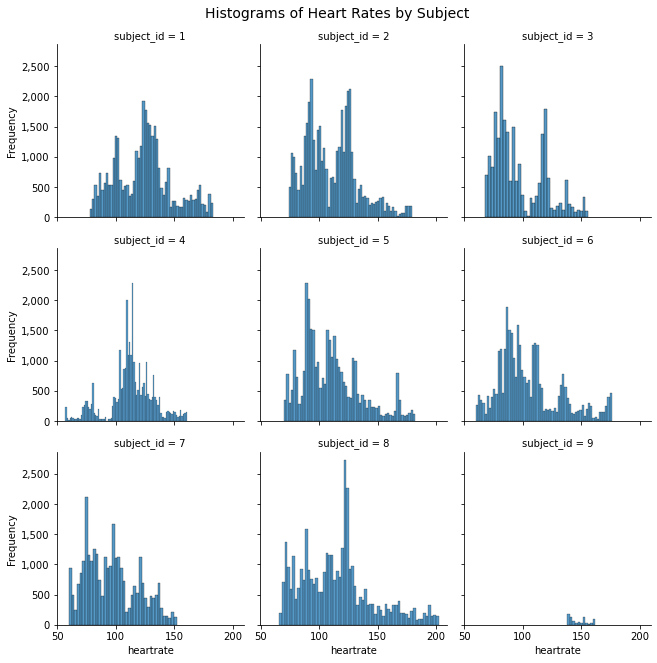

In [26]:
fg =sns.FacetGrid(df[['subject_id','heart_rate']],col='subject_id',col_wrap=3)
fg.map(sns.histplot,"heart_rate");
fg.set_axis_labels("heartrate","Frequency")

fg.fig.suptitle('Histograms of Heart Rates by Subject',x=0.5,y=1.02,fontsize=14)

for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: f'{y:,.0f}'.format(y)))

### We can observe the differences in heart rates of all our 9 subjects from the above histograms

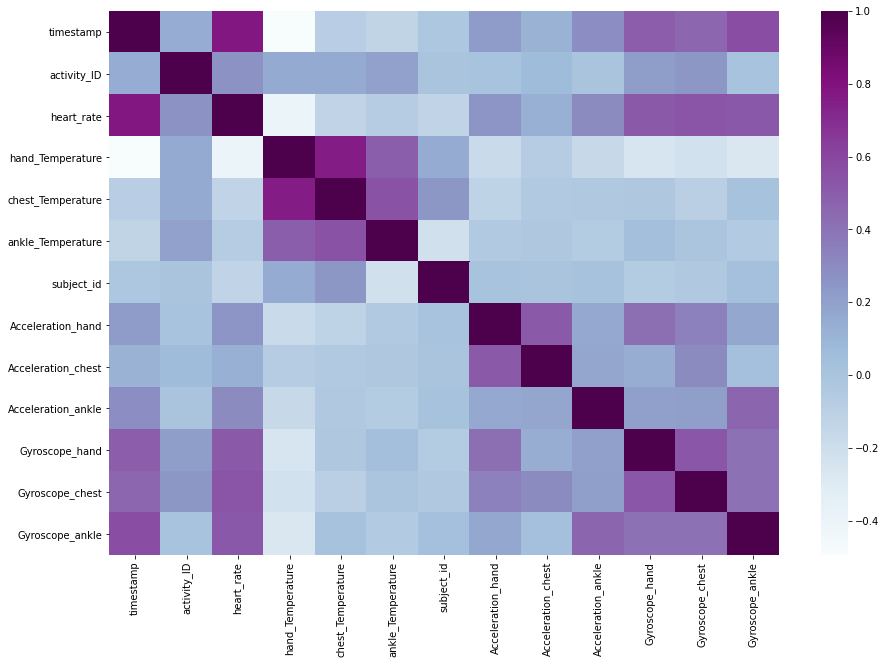

In [27]:
from pandas.plotting import scatter_matrix
df_corr = df_eda.corr()


f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BuPu",ax=ax)
plt.show()

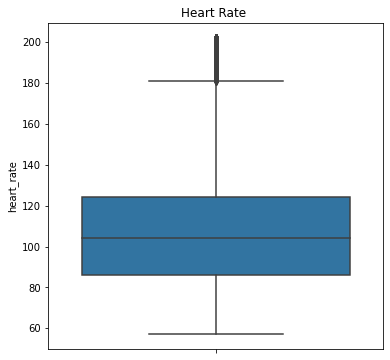

In [28]:
fig, ax = plt.subplots(figsize=(6,6))
plt.title("Heart Rate ")
ax = sns.boxplot(y=df_eda["heart_rate"])

### According to the box plot, the outliers have heart rates ranging from 180 to 202. Our highest quartile group of the four begins at 124, the end of the inter-quartile range, and ends at 180, making it our largest group when we look at the size of it on the box plot  compared to the other quartiles. Consequently, the majority of subjects taking part in the activities had heart rates ranging from 124 to 180. Our third quartile group begins at the mean value of 107.4 (the horizontal line in our box) and ends at the end of the interquartile range, 124. Our second quartile group begins at the beginning of the inter-quartile range, 86, and ends at the mean value of 124. Our first quartile group runs from the lowest data point, 57, to the beginning of the interquartile range, 86. Our box plot also reveals that while most individuals completed some activities in statistically comparable ways, they did not do so in all activities, which explains the huge upper quartile group.

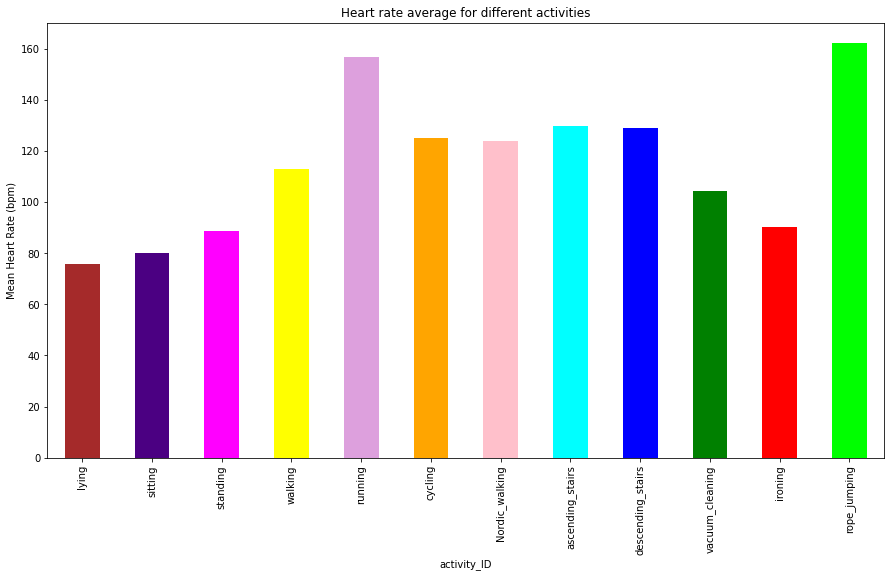

In [29]:
## plotting heart rate against each activities

heart_rate_vs_activities=df_eda['heart_rate'].groupby(df_eda['activity_ID']).mean()#grouping heart rate data wrt activity id and finds the mean of heart rate for each activity
heart_rate_vs_activities.index = heart_rate_vs_activities.index.map(activity_ID)# to get the real activity id as index
heart_rate_vs_activities.plot(kind = 'bar',figsize = (15,8), color=['brown', 'indigo', 'magenta', 'yellow', 'plum','orange','pink','cyan','blue','green','red','lime'])
plt.ylabel("Mean Heart Rate (bpm)")
plt.title('Heart rate average for different activities')
plt.show()

### The bar plot demonstrates that Rope Jumping and Running have the highest heart rate out of all the activities.

## Insights from EDA

### Now I am done with EDA so I will note down some insights of the dataset that I got

### 1. walking and ironing have the most data points, followed by lying, standing, running, and rope jumping has the fewest data points.

### 2. Physically demanding activities like running and rope jumping have high mean acceleration values for the ankle and hand.

### 3. Ironing, sitting, standing, lying and other physically easy tasks have extremely low mean accelerations for various body parts, which is obvious.

### 4. cycling is an exception, but other leg-heavy activities including walking, Nordic walking, and ascending and descending stairs have high mean ankle acceleration rates.

### 5. With the exception of rope jumping, practically other activities have minimal chest acceleration.

### 6. Ironing has a significant mean angular acceleration in the hand. Apart from that physically non challenging activities have low angular velocities for each body part.

### 7. physically non challenging activities have low angular velocities for each body part

### 8. running has a high mean angular acceleration for hand and ankle

### 9. Rope jumping has the highest mean hand angular acceleration however the ankle acceleration is relatively low in comparison to the hand.

### 10. The mean ankle acceleration is significantly higher for descending stairs than ascending.

### 11. According to me heart rate is the most important feature to identify physical activity. Rope Jumping and Running have the highest heart rate out of all the activities. Based on this observation from the eda dataset I will come with my hypothesis to test if this holds true for hypo (hypothesis dataset as well).

## 5. Hypothesis Testing

### The idea, procedures, and practise of evaluating a hypothesis by contrasting it with the null hypothesis are collectively known as hypothesis testing. The null hypothesis is only rejected if the likelihood of the null hypothesis is less than a predefined significance level, at which point the alternative hypothesis is considered to have that level of significance.

### I can see from EDA that rope jumping and running have the highest heart rate out of all the activities. Therefore my hypothesis testing will be based on these two activities and how their heart rate data correlates with the rest of the activities heart rate. This will be done by getting the mean heart rate of the two activities and then comparing it to the mean heart rate of all activities. Target is to find the mean of heart rate of the data and prove that the mean of my category is significantly larger than the other.

### *Null Hypothesis* : 
### - h0 : Subjects performing running or rope jumping activities will have the same heart rate as those performing other activities. 

### *Alternative Hypothesis* : 

### - h1 : Subjects performing running or rope jumping activities will have a higher heart rate than subjects performing other activities.

In [30]:
## Running activity mean, standard deviation and count
Running_activity = df_hypo.loc[(df_hypo["activity_ID"] == 5)] ## Getting running activity from hypo data where activity ID of running is 24
Running_activity_mean = Running_activity['heart_rate'].mean() ## calculating mean of heart rate of subjects performing running activities in hypo data
Running_activity_standard_dev = Running_activity['heart_rate'].std() ## calculating standard deviation of heart rate of subjects performing running activities in hypo data
Running_activity_count = Running_activity['heart_rate'].count() ## count of heart rate of individuals performing running activity 


print("Mean of Heart rate of individuals performing running activities = {} ".format(Running_activity_mean)) ## printing mean
print("Standard deviaion of Heart rate of individuals performing running activities = {} ".format(Running_activity_standard_dev)) ## printing standard deviation
print("Count of Heart rate of individuals performing running activities = {} ".format(Running_activity_count)) ## printing count

Mean of Heart rate of individuals performing running activities = 156.57290167797873 
Standard deviaion of Heart rate of individuals performing running activities = 22.730064410863225 
Count of Heart rate of individuals performing running activities = 49317 


In [31]:
## Rope Jumping activity mean, standard deviation and count 
Rope_jumping_activity = df_hypo.loc[(df_hypo["activity_ID"] == 24)] ## Getting rope jumping activity from hypo data where activity ID of rope jumping is 24
Rope_jumping_mean = Rope_jumping_activity['heart_rate'].mean() ## calculating mean of heart rate of subjects performing rope jumping activities in hypo data
Rope_jumping_standard_dev = Rope_jumping_activity['heart_rate'].std() ## calculating standard deviation of heart rate of subjects performing rope jumping activities in hypo data
Rope_jumping_count = Rope_jumping_activity['heart_rate'].count() ##  count of heart rate of individuals performing rope jumping activity 


print("Mean of Heart rate of individuals performing rope jumping activities = {} ".format(Rope_jumping_mean)) ## printing mean
print("Standard deviaion of Heart rate of individuals performing rope jumping activities = {} ".format(Rope_jumping_standard_dev))  ## printing standard deviation
print("Count of Heart rate of individuals performing rope jumping activities = {} ".format(Rope_jumping_count)) ## printing count

Mean of Heart rate of individuals performing rope jumping activities = 162.00313089040685 
Standard deviaion of Heart rate of individuals performing rope jumping activities = 21.565090787751508 
Count of Heart rate of individuals performing rope jumping activities = 24760 


In [32]:
## Hypothesis data mean, standard deviation, count
df_mean = df_hypo['heart_rate'].mean() # hypo data mean of heart rate
df_standard_dev = df_hypo['heart_rate'].std() # hypo data standard deviation of heart rate
df_count = df_hypo['heart_rate'].count() # hypo data count of heart rate


print("Mean of Heart rate of hypo data = {} ".format(df_mean)) # printing mean
print("Standard deviaion of Heart rate of hypo data = {} ".format(df_standard_dev)) # printing standard deviation
print("Count of Heart rate of hypo data = {} ".format(df_count)) # printing count

Mean of Heart rate of hypo data = 107.52996323363337 
Standard deviaion of Heart rate of hypo data = 27.008990831415552 
Count of Heart rate of hypo data = 971436 


In [33]:
# Calculating the mean difference for the hypothesis test
mean_difference = (Rope_jumping_mean + Running_activity_mean)/2 - df_mean
# Calculating the variance for rope jumping and running activities
Variance_Rope_jumping_activity = Rope_jumping_standard_dev**2 / Rope_jumping_count
Variance_Running_activity = Running_activity_standard_dev**2 / Running_activity_count
print("Mean difference = {}".format(mean_difference))
# Calculating the denominator of the z-score formula
denominator = np.sqrt(Variance_Rope_jumping_activity + Variance_Running_activity)
# Calculating the z-score
z = mean_difference / denominator
print("Value of Z = {}".format(z))

Mean difference = 51.758053050559425
Value of Z = 302.5873196635674


In [34]:
# Calculating the p-value
p_value = stats.norm.sf(z)
# Interpreting the results of the hypothesis test
if p_value > 0.05:
    print(f"The p-value is {p_value}, so we fail to reject the null hypothesis.")
else:
    print(f"The p-value is {p_value}, so we reject the null hypothesis.")

The p-value is 0.0, so we reject the null hypothesis.


### We can confidently reject the null hypothesis and accept our proposed alternative hypothesis : Subjects performing running or rope jumping activities will have a higher heart rate than subjects performing other activities.

### Now after I am done with my hypothesis I will move on to Modelling where I will be looking at different modelling algorithms and will be choosing one with optimum accuracy.

## 6. Modelling

### A file that has been taught to identify specific patterns is referred to as a machine learning model. We train a model over a collection of data, giving it an algorithm it may use to analyse and learn from those data to forecast yet-to-be-observed data.

In [35]:
from sklearn.tree import DecisionTreeClassifier # importing required libraries for modelling
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Again splitting the clean dataset into train data and test data to perform modelling 

In [36]:
df_train = Clean_data2.sample(frac=0.8, random_state=1)
df_test = Clean_data2.drop(df_train.index)

### In order to improve the accuracy of our model, some variables must be eliminated. timestamp and subject_id should not be included since they are numerical variables that our model would utilise in its calculations but whose values have no significance, causing noise in the method's output and inaccurate accuracy forecasts.

In [37]:
df_train = df_train.drop(["timestamp", "subject_id"],1) # dropping timestamp and subject_id

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler

#apply scaling to all columns except subject and activity 
scaler = RobustScaler()
df_scaled = df_train.copy()
df_scaled_test = df_test.copy()

df_scaled.iloc[:,1:11] = scaler.fit_transform(df_scaled.iloc[:,1:11])
df_scaled_test.iloc[:,1:11] = scaler.fit_transform(df_scaled_test.iloc[:,1:11])

df_scaled.head()

activity_ID  heart_rate  hand_Temperature  chest_Temperature  \
312921             3   -0.368421          0.447368           0.472222   
141735            12    1.681818          0.236842           0.222222   
1191085           24    2.026316          0.289474           0.000000   
1206914            1   -1.105263          0.131579          -0.388889   
1710520            2   -0.657895          0.500000           0.527778   

         ankle_Temperature  Acceleration_hand  Acceleration_chest  \
312921            0.500000          -0.025788            0.250044   
141735            0.583333           1.105917            3.936793   
1191085           0.041667          -0.722998            1.543742   
1206914           0.375000          -0.100060           -0.418926   
1710520          -0.083333          -0.037686            0.153513   

         Acceleration_ankle  Gyroscope_hand  Gyroscope_chest  Gyroscope_ankle  
312921            -0.101907       -0.394032        -0.465997        -0.204817  
141735             0.983898        0.575913         0.176470         0.097034  
1191085           -1.294049        1.759682         3.532308         0.700847  
1206914            0.064255       -0.443444        -0.547425        -0.248383  
1710520           -0.062627       -0.445489        -0.466598        -0.242089

In [39]:
# Keeping activity_ID as target variable for train data
X_train = df_scaled.drop('activity_ID', axis=1).values
y_train = df_scaled['activity_ID'].values

# Keeping activity_ID as target variable for test data 
X_test = df_scaled.drop('activity_ID', axis=1).values
y_test = df_scaled['activity_ID'].values

### Dimensionality reduction using Principal Component Analysis(PCA)


### Usually, 90–98% of the variation will adequately explain our results. As a result, we could determine how many of those we could utilise by graphing the variance ratio against the number of components. The graph below shows that 3 components account for almost 94% of the variation.

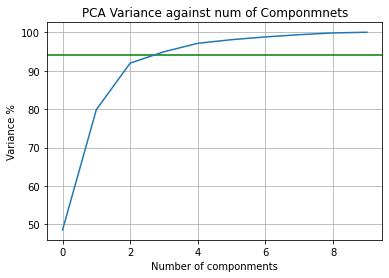

In [40]:
from sklearn.decomposition import PCA #importing PCA from Sklearn
pca = PCA()
pca.fit(X_train) ## fitting the train data
var= pca.explained_variance_ratio_ # it explains how much variance is captured by the number of components
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against num of Componmnets")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(94, color="green") # the meeting point between the line and the curve will give how many components we need to consider for capturing 94% variance


plt.plot(var1)
plt.grid()

In [41]:
pca = PCA(n_components= 3) # Creating PCA object for 3 features
X_train=pca.fit_transform(X_train) # fitting X_train
X_test=pca.fit_transform(X_test) # using the same pca object to transform X_test

## Choosing the best model
### Now I will train two models and check their performance.

### I will focus on two modelling algorithms, Random Forest and Logistic Regression.

### Random Forest algorithm - Random Forest is a commonly used machine learning algorithm that combines the output of several decision trees to get to a single outcome. Its widespread use is motivated by its adaptability and usability since it can solve classification and regression issues. Random Forest algorithm provides very high accuracy for high dimensionality datasets.

### Logistic Regression algorithm - A dependent categorical target variable is predicted using the supervised learning approach known as logistic regression.  If there is a large set of data to categorize, logistic regression is helpful

In [42]:
def get_metrics (y_true,y_pred): # function to get accuracy,error,precision,Recall and F1 score of the data
    acc = accuracy_score(y_true, y_pred)
    err = 1-acc
    p = precision_score(y_true, y_pred,average=None).mean()
    r = recall_score(y_true, y_pred, average=None).mean()
    f1 = f1_score(y_true, y_pred, average=None).mean()
   
    print("Accuracy: ",acc)
    print("Error: ",err)
    print("Precision", p)
    print("Recall", r)
    print("F1", f1)
    #print("Accuracy: %.3f \nError: %.3f \nPrecesion: %.3f \nRecall: %.3f \nF1:%.3f \n"% (acc,err,p,r,f1) )
    



In [43]:
Log_reg = LogisticRegression() # logistic regression
Log_reg.fit(X=X_train, y=y_train ) # fitting training data
y_pred_Lr = Log_reg.predict(X_test) # predicting testing data
get_metrics(y_test, y_pred_Lr) # checking accuracy,error,precision, recall and F1 score

Accuracy:  0.21880102785952243
Error:  0.7811989721404775
Precision 0.19184656112869114
Recall 0.17366062402775706
F1 0.11646166874046983


### Logistic regression model is not performing well for some reason and giving very high error and low accuracy. I will run it again without reducing dimensionality to check if PCA is the problem.

In [44]:
df_train = Clean_data2.sample(frac=0.8, random_state=1)
df_test = Clean_data2.drop(df_train.index)

In [45]:
df_train = df_train.drop(["timestamp", "subject_id"],1) # dropping timestamp and subject_id

In [46]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler

#apply scaling to all columns except subject and activity 
scaler = RobustScaler()
df_scaled = df_train.copy()
df_scaled_test = df_test.copy()

df_scaled.iloc[:,1:11] = scaler.fit_transform(df_scaled.iloc[:,1:11])
df_scaled_test.iloc[:,1:11] = scaler.fit_transform(df_scaled_test.iloc[:,1:11])

df_scaled.head()

activity_ID  heart_rate  hand_Temperature  chest_Temperature  \
312921             3   -0.368421          0.447368           0.472222   
141735            12    1.681818          0.236842           0.222222   
1191085           24    2.026316          0.289474           0.000000   
1206914            1   -1.105263          0.131579          -0.388889   
1710520            2   -0.657895          0.500000           0.527778   

         ankle_Temperature  Acceleration_hand  Acceleration_chest  \
312921            0.500000          -0.025788            0.250044   
141735            0.583333           1.105917            3.936793   
1191085           0.041667          -0.722998            1.543742   
1206914           0.375000          -0.100060           -0.418926   
1710520          -0.083333          -0.037686            0.153513   

         Acceleration_ankle  Gyroscope_hand  Gyroscope_chest  Gyroscope_ankle  
312921            -0.101907       -0.394032        -0.465997        -0.204817  
141735             0.983898        0.575913         0.176470         0.097034  
1191085           -1.294049        1.759682         3.532308         0.700847  
1206914            0.064255       -0.443444        -0.547425        -0.248383  
1710520           -0.062627       -0.445489        -0.466598        -0.242089

In [47]:
# Keeping activity_ID as target variable for train data
X_train = df_scaled.drop('activity_ID', axis=1).values
y_train = df_scaled['activity_ID'].values

# # Keeping activity_ID as target variable for test Dataset
X_test = df_scaled.drop('activity_ID', axis=1).values
y_test = df_scaled['activity_ID'].values

In [48]:
Log_reg = LogisticRegression() # logistic regression
Log_reg.fit(X=X_train, y=y_train ) # fitting training data
y_pred_Lr = Log_reg.predict(X_test) # predicting testing data
get_metrics(y_test, y_pred_Lr) # checking accuracy,error,precision, recall and F1 score

Accuracy:  0.6217153982054922
Error:  0.37828460179450785
Precision 0.6096947202534058
Recall 0.6019224547874417
F1 0.6024571992672061


### Here as I can see the accuracy of logistic regression model has increased significantly without doing dimentionality reduction using PCA  so I will continue to do my next model Random Forest Classifier without using PCA. And also the variables of my dataset has also become less after data cleaning and dropping timestamp and subject_id columns.

In [49]:
from sklearn.ensemble import RandomForestClassifier 
Rfc = RandomForestClassifier(n_jobs =4) # Random Forest
Rfc.fit(X_train,y_train) # fitting training data
y_pred_Rf = Rfc.predict(X_test) # predicting testing data
get_metrics(y_test,y_pred_Rf) # checking accuracy,error,precision, recall and F1 score

Accuracy:  1.0
Error:  0.0
Precision 1.0
Recall 1.0
F1 1.0


###  Cross validation

### Even though the above models seem to perform really good, the metrics used for that do not represent the real score since the models were train on a specific part of the dataset. By using cross validation, we could k=10 number of folds, which in few words, will generate 10 different samples. By doing that we will get 10 different metrics values. The mean value of these metrics will show a better representation of our model's performance

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

classifiers = [LogisticRegression(),
               RandomForestClassifier(n_jobs =4)]

score_lst = []
for cls in classifiers:
    accs  = accuracy_score(y_train, cross_val_predict(cls,X_train,y_train,cv = 10))  #cross validate the accurancy 
    scores = cross_val_score(cls,X_train,y_train,scoring = "neg_mean_squared_error",cv= 10)#calcuate the error
    score = np.sqrt(-scores)
    f1 = cross_val_score(cls,X_test, y_test,scoring = "f1_macro", cv =10)
    
    
    #p = cross_val_score(cls,X_test, y_test,scoring = "average_precision", cv =10)
#     r = recall_score(y_true, y_pred, average=None).mean()
#     f1 = f1_score(y_true, y_pred, average=None).mean()
    score_lst.append([cls.__class__.__name__,accs,score.mean(), f1.mean()])

df_scores=pd.DataFrame(columns = ["Claasifier","Accurancy","MSE","F1"],data =  score_lst)
display(df_scores)

Claasifier  Accurancy       MSE        F1
0      LogisticRegression   0.621411  4.805517  0.601929
1  RandomForestClassifier   0.998923  0.332565  0.998783

## 7.Conclusion

### The PAMAP2 physical activity monitoring dataset is loaded, cleaned, analyzed and various insights have been obtained from the data through Exploratory data analysis (EDA). Hypothesis testing is performed on separate hypo dataset to make sure that my findings in exploratory data analysis is statistically significant. Then I have done modelling where Random Forest Classifier came out to be the best model with much much higher accuracy than Logistic Regression algorithm. My final conclusion is that I personally consider heart rate to be the most important feature out of all to make the commercial hardware that would be able to classify all activities and to use Random Forest algorithm to build it.

## 8.References

### 1. A. Reiss and D. Stricker. Introducing a New Benchmarked Dataset for Activity Monitoring. The 16th IEEE International Symposium on Wearable Computers (ISWC), 2012. - https://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring

### 2.A. Reiss and D. Stricker. Creating and Benchmarking a New Dataset for Physical Activity Monitoring. The 5th Workshop on Affect and Behaviour Related Assistance (ABRA), 2012. - https://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring

### 3. https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d

### 4. https://developer.ibm.com/tutorials/learn-classification-algorithms-using-python-and-scikit-learn/

